In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

In [83]:
data = pd.read_csv('data/train.csv')

In [84]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
data.shape

(42000, 785)

In [86]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
data

array([[8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
m, n

(42000, 785)

*Create train, valid sets*

In [88]:
# Transpose to have each samples features in a single column
valid_data = data[:1000].T
valid_data.shape

(785, 1000)

In [107]:
# first row has labels
y_valid = valid_data[0]
X_valid = valid_data[1:] / 255.

In [90]:
train_data = data[1000:].T
train_data.shape

(785, 41000)

In [108]:
y_train = train_data[0]
X_train = train_data[1:] / 255.
X_train[:,0].shape

(784,)

*Create Network*

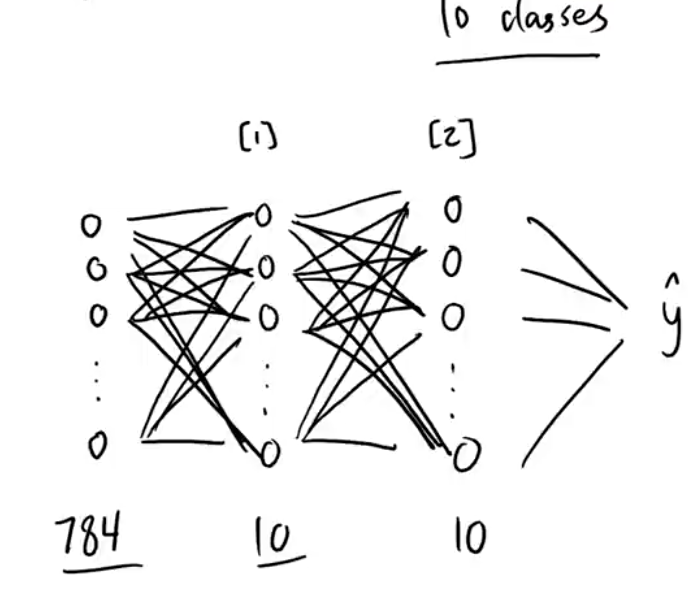

In [109]:
W1 = np.random.rand(10, X_train[:,0].shape[0])
W1.shape[0]

10

In [110]:
def init_params():
    # W shape -> (units, prev layer units)
    # b shape -> (units, 1)
    W1 = np.random.rand(10, X_train[:,0].shape[0]) - .5
    b1 = np.random.rand(10, 1) - .5
    W2 = np.random.rand(10, W1.shape[0]) - .5
    b2 = np.random.rand(10, 1) - .5
    
    return W1, b1, W2, b2

In [111]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1

    # Make each column an example instead of each row
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

In [112]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

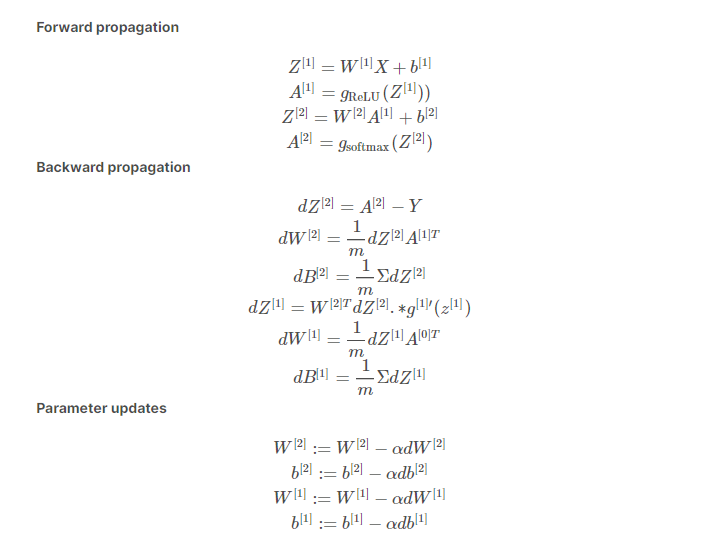

**Note**:
```
dz2 = 2 * (A2 - Y)
```

In [113]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    
    return dW1, db1, dW2, db2

In [114]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10, 1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10, 1))
    return W1, b1, W2, b2

In [115]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [118]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        print('Iteration: ', i)
        print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
            
    return W1, b1, W2, b2

In [119]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, .1)

Iteration:  0
[0 6 6 ... 6 0 6] [3 0 3 ... 4 2 6]
Accuracy:  0.14290243902439023
Iteration:  1
[0 0 6 ... 2 8 6] [3 0 3 ... 4 2 6]
Accuracy:  0.17348780487804877
Iteration:  2
[0 0 6 ... 2 8 6] [3 0 3 ... 4 2 6]
Accuracy:  0.17917073170731707
Iteration:  3
[0 0 6 ... 2 8 6] [3 0 3 ... 4 2 6]
Accuracy:  0.19797560975609757
Iteration:  4
[0 0 6 ... 2 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.21882926829268293
Iteration:  5
[0 0 6 ... 6 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.24058536585365853
Iteration:  6
[0 0 6 ... 6 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.2609268292682927
Iteration:  7
[0 0 6 ... 6 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.27946341463414637
Iteration:  8
[0 0 6 ... 7 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.29753658536585365
Iteration:  9
[0 0 6 ... 7 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.3119268292682927
Iteration:  10
[0 0 6 ... 7 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.3271951219512195
Iteration:  11
[0 0 6 ... 7 3 6] [3 0 3 ... 4 2 6]
Accuracy:  0.34239024390243905
Iteration:  12
[0 0 6 ... 7 3

Iteration:  102
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7534634146341463
Iteration:  103
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7552439024390244
Iteration:  104
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7571219512195122
Iteration:  105
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7584146341463415
Iteration:  106
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7599268292682927
Iteration:  107
[0 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7612439024390244
Iteration:  108
[3 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7630243902439025
Iteration:  109
[3 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7643170731707317
Iteration:  110
[3 0 3 ... 7 8 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7659268292682927
Iteration:  111
[3 0 3 ... 7 2 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7675121951219512
Iteration:  112
[3 0 3 ... 7 2 5] [3 0 3 ... 4 2 6]
Accuracy:  0.7691463414634147
Iteration:  113
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.7707073170731708
Iteration:  114


[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8360975609756097
Iteration:  205
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8365365853658536
Iteration:  206
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8370487804878048
Iteration:  207
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8372926829268292
Iteration:  208
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8375365853658536
Iteration:  209
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8376341463414634
Iteration:  210
[3 0 3 ... 7 2 8] [3 0 3 ... 4 2 6]
Accuracy:  0.8380731707317073
Iteration:  211
[3 0 3 ... 7 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8383170731707317
Iteration:  212
[3 0 3 ... 7 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8386097560975609
Iteration:  213
[3 0 3 ... 7 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8390731707317073
Iteration:  214
[3 0 3 ... 7 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8394146341463414
Iteration:  215
[3 0 3 ... 7 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8397317073170731
Iteration:  216
[3 0 3 ... 7 2 1

Iteration:  305
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.861780487804878
Iteration:  306
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.862
Iteration:  307
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8621463414634146
Iteration:  308
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8622682926829268
Iteration:  309
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8625365853658536
Iteration:  310
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8626829268292683
Iteration:  311
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8628536585365854
Iteration:  312
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.863
Iteration:  313
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8631707317073171
Iteration:  314
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8633170731707317
Iteration:  315
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.863390243902439
Iteration:  316
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8634878048780488
Iteration:  317
[3 0 3 ... 6 2 1] [3 0 3 ...

[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8758292682926829
Iteration:  408
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8759024390243902
Iteration:  409
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8760243902439024
Iteration:  410
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8760731707317073
Iteration:  411
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8761951219512195
Iteration:  412
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8763414634146341
Iteration:  413
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8763414634146341
Iteration:  414
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8765365853658537
Iteration:  415
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8766341463414634
Iteration:  416
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8768292682926829
Iteration:  417
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8769024390243902
Iteration:  418
[3 0 3 ... 6 2 1] [3 0 3 ... 4 2 6]
Accuracy:  0.8770243902439024
Iteration:  419
[3 0 3 ... 6 2 1

In [122]:
with open('params.pkl', 'wb') as dump_file:
    pkl.dump((W1, b1, W2, b2), dump_file)

In [123]:
with open('params.pkl', 'rb') as dump_file:
    W1, b1, W2, b2 = pkl.load(dump_file)

*Create predictions*

In [146]:
def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions[0]

In [147]:
def show_predictions(index, X, Y, W1, b1, W2, b2):
    img = X[:, index, None]
    prediction = make_predictions(img, W1, b1, W2, b2)
    label = Y[index]

    current_image = img.reshape((28, 28)) * 255

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f'Label: {label} | Prediction: {prediction}')
    plt.show()

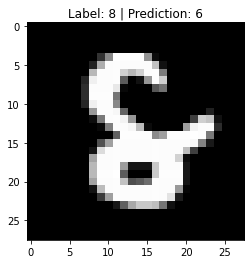

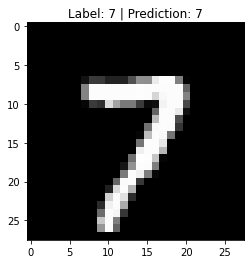

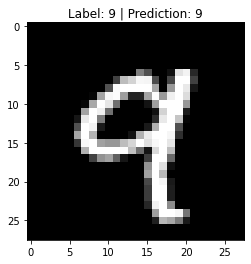

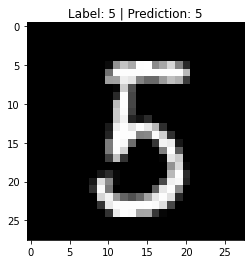

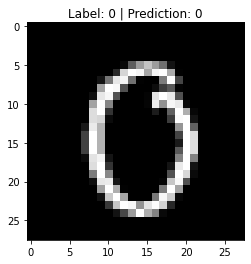

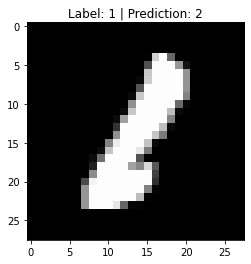

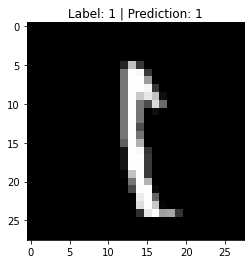

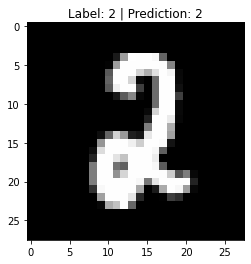

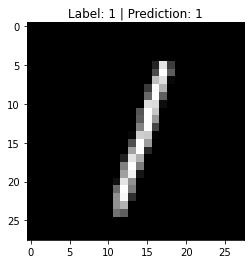

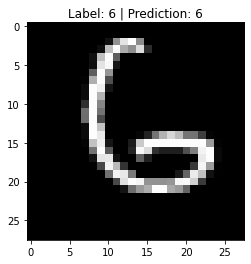

In [150]:
plt.figure()

for i in range(10):
    show_prediction(i, X_valid, y_valid, W1, b1, W2, b2)

*Evaluate*

In [152]:
X_valid.shape[1]

1000

In [153]:
preds = []
for i in range(X_valid.shape[1]):
    img = X_valid[:, i, None]
    preds.append(make_predictions(img, W1, b1, W2, b2))

In [157]:
preds = np.array(preds)
preds[:10]

array([6, 7, 9, 5, 0, 2, 1, 2, 1, 6], dtype=int64)

In [158]:
y_valid[:10]

array([8, 7, 9, 5, 0, 1, 1, 2, 1, 6], dtype=int64)

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay

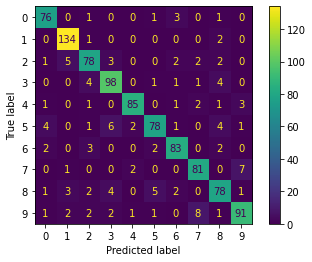

In [161]:
cm = confusion_matrix(y_valid, preds)
cm_d = ConfusionMatrixDisplay(cm)
cm_d.plot();

In [163]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        82
           1       0.92      0.98      0.95       137
           2       0.84      0.84      0.84        93
           3       0.87      0.90      0.88       109
           4       0.94      0.90      0.92        94
           5       0.89      0.80      0.84        97
           6       0.89      0.90      0.90        92
           7       0.86      0.89      0.88        91
           8       0.82      0.81      0.82        96
           9       0.88      0.83      0.86       109

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

